In [4]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the Dataset
uber_data = pd.read_csv('UberDataset.csv') 

In [6]:
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
uber_data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
uber_data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [11]:
#drop the missing value
uber_data.dropna(subset=['END_DATE'], inplace=True)
uber_data.dropna(subset=['CATEGORY'], inplace=True)
uber_data.dropna(subset=['START'], inplace=True)
uber_data.dropna(subset=['STOP'], inplace=True)
# Fill missing 'PURPOSE' values with "Unknown"
uber_data['PURPOSE'].fillna('Unknown', inplace=True)

In [12]:
# Convert 'START_DATE' and 'END_DATE' columns to datetime data type
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce', format='%m-%d-%Y %H:%M')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce', format='%m-%d-%Y %H:%M')

# Handle the remaining dates with a different format
uber_data['START_DATE'].fillna(pd.to_datetime(uber_data['START_DATE'], errors='coerce', format='%m/%d/%Y %H:%M'), inplace=True)
uber_data['END_DATE'].fillna(pd.to_datetime(uber_data['END_DATE'], errors='coerce', format='%m/%d/%Y %H:%M'), inplace=True)


In [13]:
uber_data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

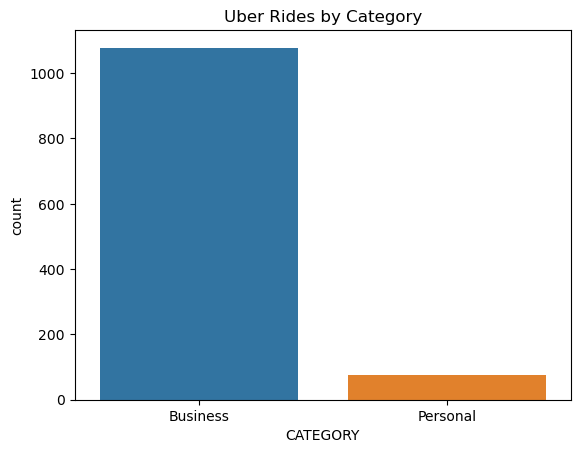

In [14]:
# Visualize ride distribution over categories
sns.countplot(x='CATEGORY', data=uber_data)
plt.title('Uber Rides by Category')
plt.show()

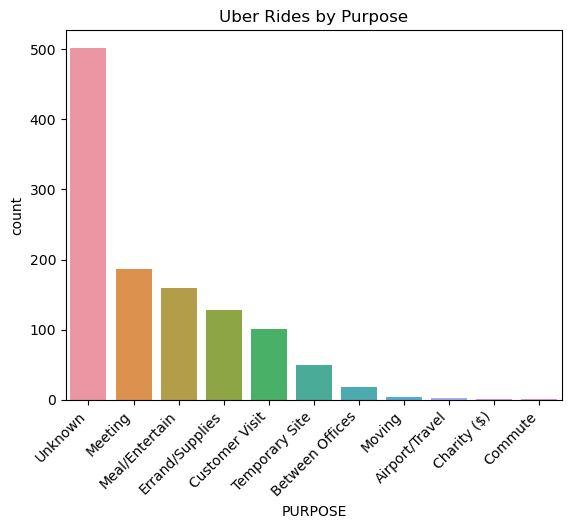

In [15]:
# Visualize ride distribution over purposes
sns.countplot(x='PURPOSE', data=uber_data, order=uber_data['PURPOSE'].value_counts().index)
plt.title('Uber Rides by Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

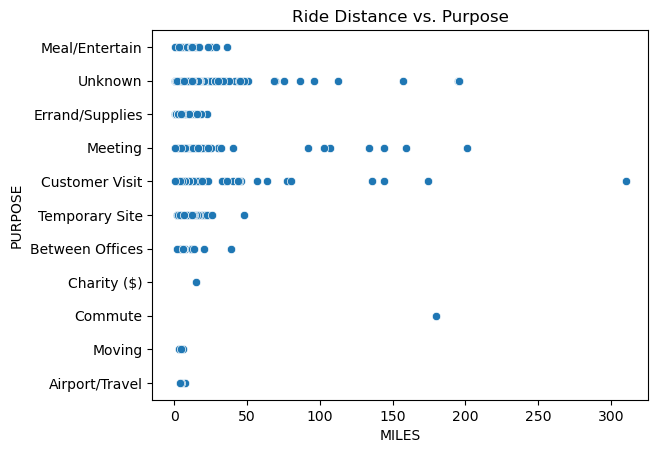

In [16]:
# Scatter plot of ride duration vs. distance
sns.scatterplot(x='MILES', y='PURPOSE', data=uber_data)
plt.title('Ride Distance vs. Purpose')
plt.show()

In [17]:
# Analyze user behavior based on CATEGORY (Assuming 'Business' and 'Personal' are user categories)
user_behavior = uber_data.groupby('CATEGORY').size().sort_values(ascending=False)
print("User Behavior:")
print(user_behavior)

User Behavior:
CATEGORY
Business    1078
Personal      77
dtype: int64


In [21]:
#Checking Stations and Categories
columns_to_check = ['CATEGORY' , 'PURPOSE']

for column in columns_to_check:
    d_v = uber_data[column].unique()
    print(f"Distinct values in '{column}':")
    print(d_v)
    print()

Distinct values in 'CATEGORY':
['Business' 'Personal']

Distinct values in 'PURPOSE':
['Meal/Entertain' 'Unknown' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']



PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Unknown              9.748008
Name: MILES, dtype: float64


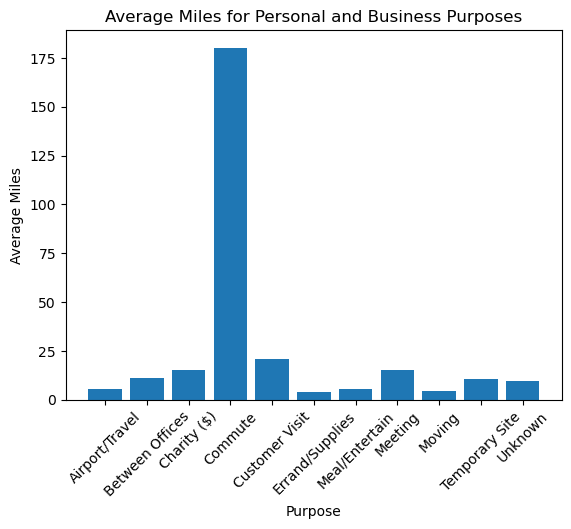

In [30]:
#Miles by Purpose
average_miles_by_purpose = uber_data.groupby('PURPOSE')['MILES'].mean()
print(average_miles_by_purpose)
# Plotting the bar chart
plt.bar(average_miles_by_purpose.index, average_miles_by_purpose.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.xticks(rotation=45)
plt.show()

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64


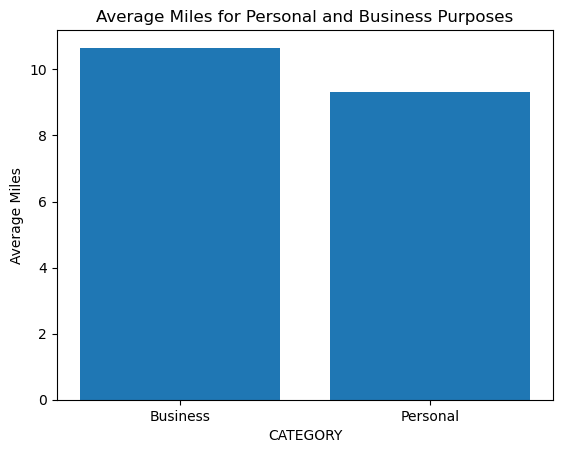

In [29]:
#Miles by Category
average_miles_by_cat = uber_data.groupby('CATEGORY')['MILES'].mean()
print(average_miles_by_cat)
plt.bar(average_miles_by_cat.index, average_miles_by_cat.values)
plt.xlabel('CATEGORY')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.show()

In [32]:
#Start Station Analysis
# Get the top 10 start stations
top_10_start_stations = uber_data['START'].value_counts().nlargest(10)

# Get the top 10 stop stations
top_10_stop_stations = uber_data['STOP'].value_counts().nlargest(10)

print("Top 10 Start Stations:")
print(top_10_start_stations)

print("\nTop 10 Stop Stations:")
print(top_10_stop_stations)

Top 10 Start Stations:
START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

Top 10 Stop Stations:
STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


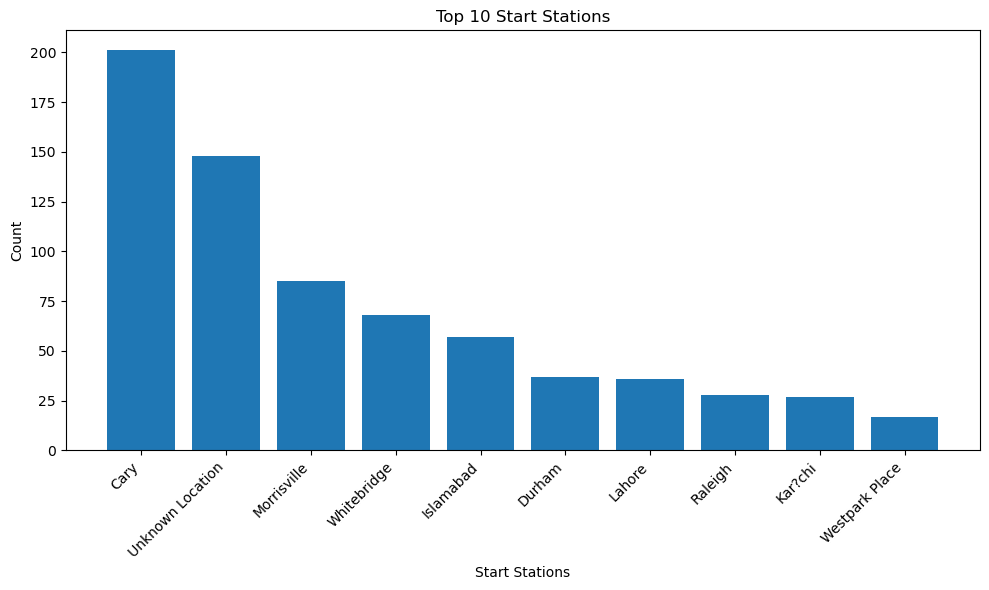

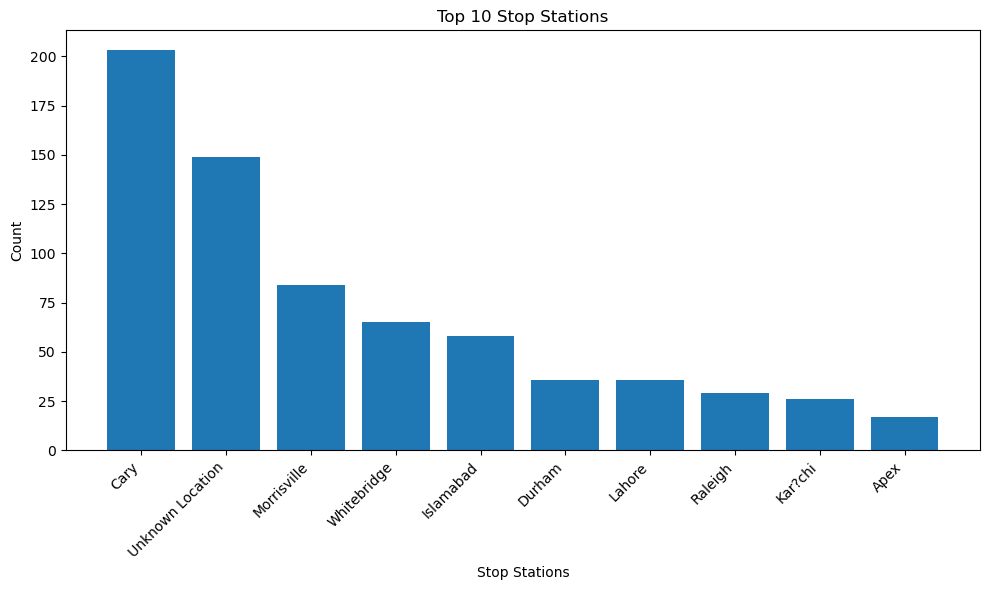

In [33]:
#Visualization for Start Station
# Plotting the top 10 start stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_start_stations.index, top_10_start_stations.values)
plt.xlabel('Start Stations')
plt.ylabel('Count')
plt.title('Top 10 Start Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_stop_stations.index, top_10_stop_stations.values)
plt.xlabel('Stop Stations')
plt.ylabel('Count')
plt.title('Top 10 Stop Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

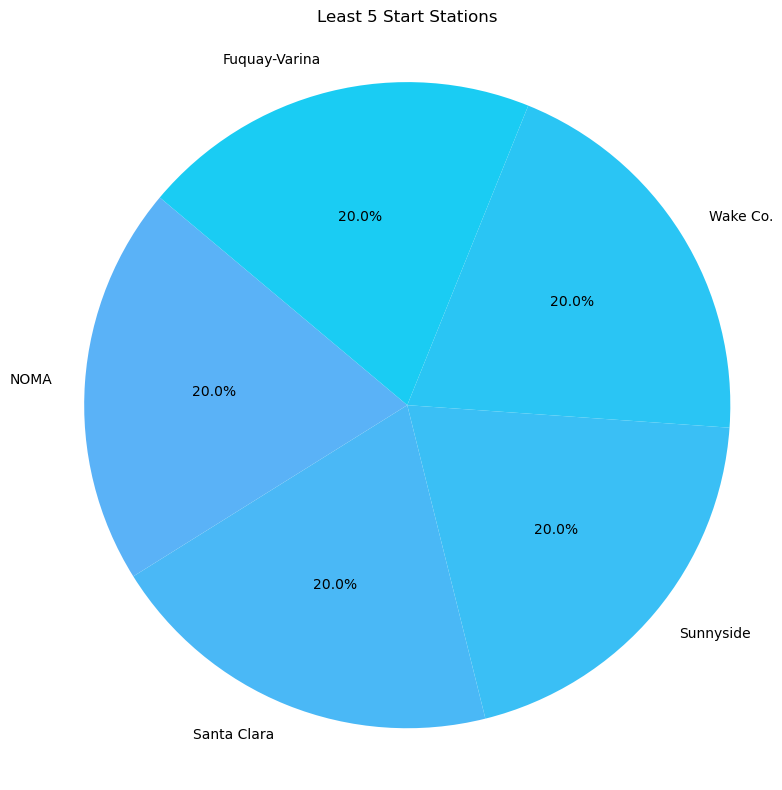

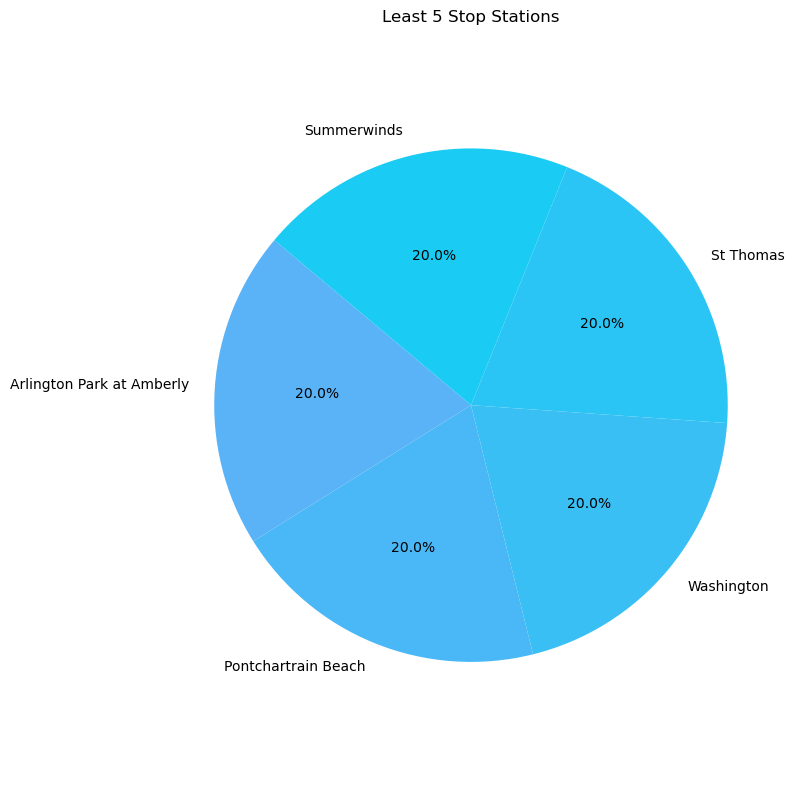

In [35]:
#Analysis for least Start Stations
# Get the least 5 start stations
least_5_start_stations = uber_data['START'].value_counts().nsmallest(5)

# Get the least 5 stop stations
least_5_stop_stations = uber_data['STOP'].value_counts().nsmallest(5)

five_colors = ['#5AB2F7', '#4AB8F6', '#3ABFF5', '#2AC5F4', '#1ACCF3']

# Plotting the top 10 start stations as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(least_5_start_stations, labels=least_5_start_stations.index, autopct='%1.1f%%', startangle=140, colors=five_colors)
plt.axis('equal')
plt.title('Least 5 Start Stations')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(least_5_stop_stations, labels=least_5_stop_stations.index, autopct='%1.1f%%', startangle=140, colors=five_colors)
plt.axis('equal')
plt.title('Least 5 Stop Stations')
plt.tight_layout()
plt.show()
